<a href="https://colab.research.google.com/github/Koffyie/Scraping-data/blob/main/Week6/Linear_Regression_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression--Goal is to obtain the values of a and b with low error function

Gradients descent is used whenever you wan to minimize a function, gradient ascent is used when you want to maximize

In [3]:
import sklearn

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler   #for normalization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
insurance_df = pd.read_csv("/content/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Predicting insurance charges with just one feature, charges vs age

Text(0, 0.5, 'charges')

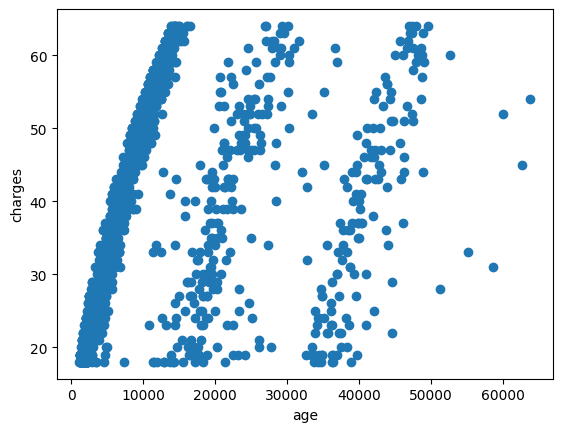

In [6]:
plt.scatter(insurance_df['charges'], insurance_df['age'])
plt.xlabel('age')
plt.ylabel('charges')

In [7]:
numerical_columns = insurance_df.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_columns

['age', 'bmi', 'children', 'charges']

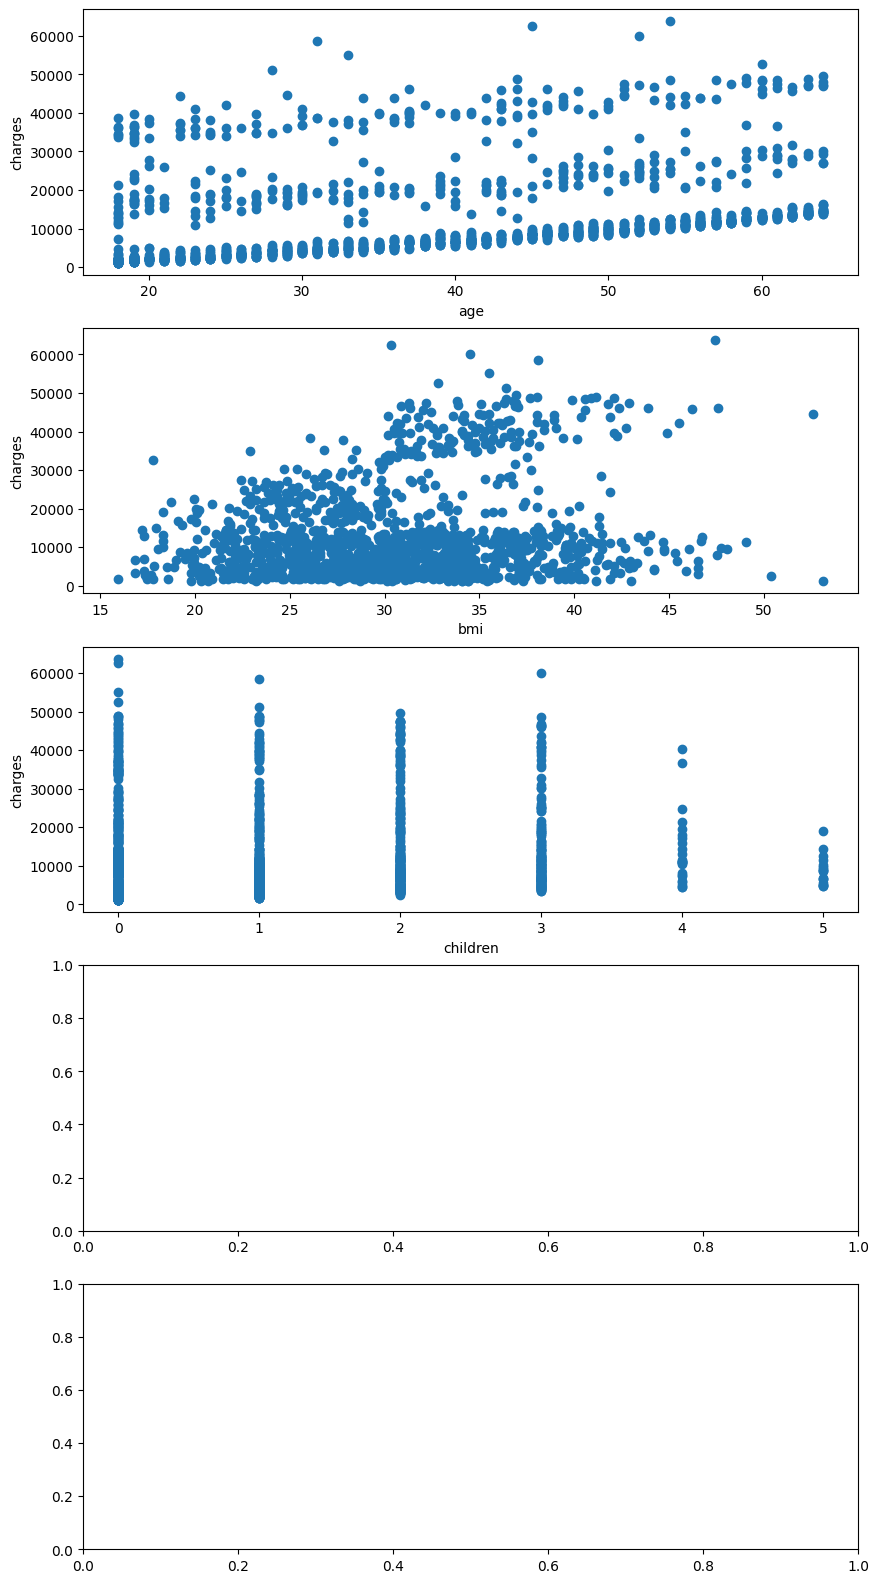

In [8]:
fig, axs = plt.subplots(5, figsize=(10,20))
n_axs = 0
for column in numerical_columns:
    if column == "charges":
        continue
    axs[n_axs].scatter(insurance_df[column], insurance_df["charges"])
    axs[n_axs].set_ylabel("charges")
    axs[n_axs].set_xlabel(column)
    n_axs += 1

In [9]:
insurance_df[numerical_columns].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

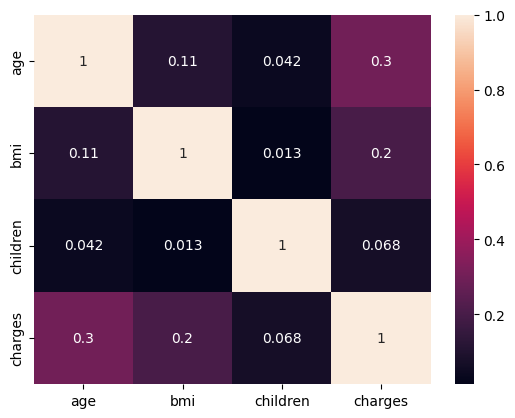

In [10]:
import seaborn as sns
sns.heatmap(insurance_df[numerical_columns].corr(), annot=True)

Age and bmi is more correlated with charges han other ones.
Now building our Linear Regression model with one feature, age, using mse to measure performance.

In [11]:
from sklearn.model_selection import train_test_split
insurance_df_train, insurance_df_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [12]:
insurance_df_train.head()

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105


In [13]:
insurance_df_test.head()

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250


In [14]:
linreg = LinearRegression()
linreg.fit(X=insurance_df_train[['age']], y=insurance_df_train["charges"])

LinearRegression()

We have trained the linear regression model and to check its performance, we use mean squared error

In [15]:
train_mse_age = mean_squared_error(insurance_df_train["charges"], linreg.predict(insurance_df_train[["age"]]))
test_mse_age = mean_squared_error(insurance_df_test["charges"], linreg.predict(insurance_df_test[["age"]]))
print("Train MSE", train_mse_age)
print("Test MSE", test_mse_age)

Train MSE 132098968.62308447
Test MSE 139176465.01367894


The errors obtained using just age to train the linear regression model, are quite large

Plotting line of best fit with test and train set

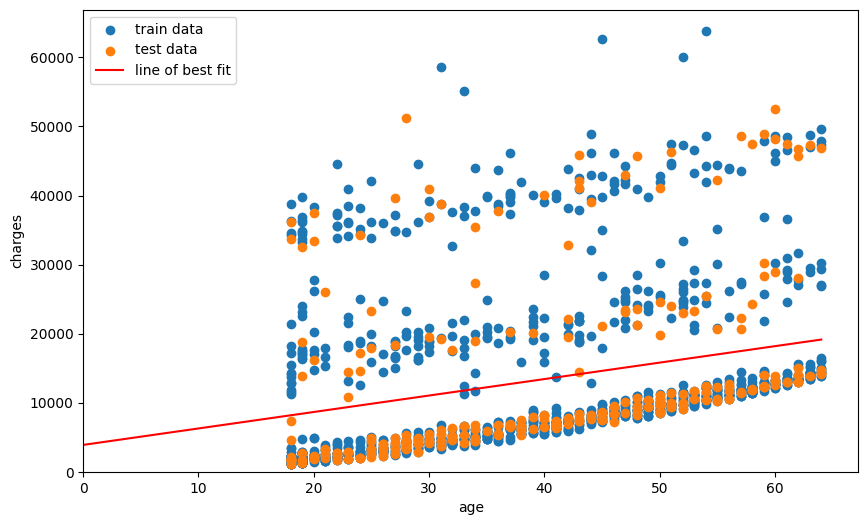

In [16]:
fig = plt.figure(figsize=(10,6))
plt.scatter(insurance_df_train["age"], insurance_df_train["charges"], label="train data")
plt.scatter(insurance_df_test["age"], insurance_df_test["charges"], label="test data")

# predictions using y = ax + b
predictions = [linreg.coef_*i + linreg.intercept_ for i in [0, insurance_df_train["age"].max()]]

# plot the line based on the prediction
plt.plot([0, insurance_df_train["age"].max()], predictions, color="r", label="line of best fit")

plt.xlabel("age"); plt.ylabel("charges")
plt.ylim(0)
plt.xlim(0)
plt.legend();

Using 2 features: age and bmi

In [17]:
insurance_df_train[["charges", "age", "bmi"]].head()

,charges,age,bmi
621,40182.24600,37,34.100
194,1137.46970,18,34.430
240,38511.62830,23,36.670
1168,4670.64000,32,35.200
1192,13019.16105,58,32.395


age and bmi aren't really in the same range. To train a Linear Regression model using more than 1 feature, they have to be in the same range to avoid errors for gradient descent algorithm

In [18]:
scaler = MinMaxScaler()
scaler.fit(insurance_df_train[["age", "bmi"]])
result = scaler.transform(insurance_df_train[["age", "bmi"]])
scld_insurance_df_train = insurance_df_train[["charges", "age", "bmi"]].copy()
scld_insurance_df_train["age"] = result[:,0]
scld_insurance_df_train["bmi"] = result[:,1]
scld_insurance_df_train.head()

,charges,age,bmi
621,40182.24600,0.413043,0.488028
194,1137.46970,0.000000,0.496906
240,38511.62830,0.108696,0.557170
1168,4670.64000,0.304348,0.517622
1192,13019.16105,0.869565,0.442158


In [19]:
linreg.fit(X=scld_insurance_df_train[["age", "bmi"]], y=scld_insurance_df_train["charges"])

LinearRegression()

In [20]:
# train mse
train_mse_age_bmi = (
    mean_squared_error(scld_insurance_df_train["charges"], linreg.predict(scld_insurance_df_train[["age", "bmi"]]))
)

# test mse
# we first need to scale the test data
scld_insurance_df_test = insurance_df_test[["charges", "age","bmi"]].copy()
result = scaler.transform(scld_insurance_df_test[["age", "bmi"]])
scld_insurance_df_test["age"] = result[:, 0]
scld_insurance_df_test["bmi"] = result[:, 1]
test_mse_age_bmi = (
    mean_squared_error(scld_insurance_df_test["charges"], linreg.predict(scld_insurance_df_test[["age", "bmi"]]))
)
print(
    f"train mse (using age and bmi) = {train_mse_age_bmi}\n"
    f"test mse (using age and bmi)  = {test_mse_age_bmi}"
)

train mse (using age and bmi) = 128701675.0866843
test mse (using age and bmi)  = 132649612.73837943


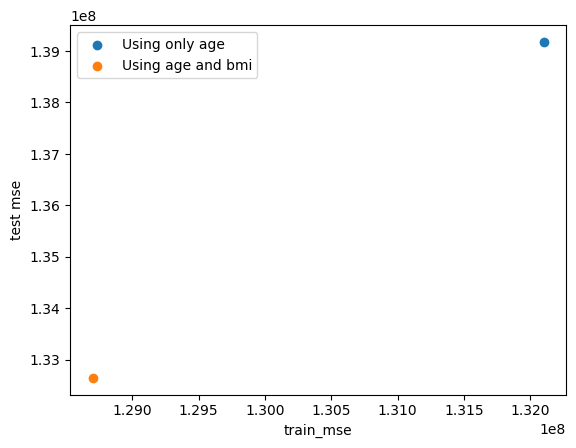

In [21]:
plt.scatter([train_mse_age], [test_mse_age], label="Using only age")
plt.scatter([train_mse_age_bmi], [test_mse_age_bmi], label="Using age and bmi")
plt.ylabel("test mse")
plt.xlabel("train_mse")
plt.legend()

Using all the numerical columns

In [22]:
numerical_columns

['age', 'bmi', 'children', 'charges']

In [23]:
numerical_feature_columns = [c for c in numerical_columns if c != "charges"]
numerical_feature_columns

['age', 'bmi', 'children']

In [24]:
X_train = insurance_df_train[numerical_feature_columns]
y_train = insurance_df_train["charges"]
X_test = insurance_df_test[numerical_feature_columns]
y_test = insurance_df_test["charges"]

# feature scaling/normalization
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train the model
linreg.fit(X_train, y_train)

train_mse_all_numerical = mean_squared_error(y_train, linreg.predict(X_train))
test_mse_all_numerical = mean_squared_error(y_test, linreg.predict(X_test))

print(
    "Using all numerical features:\n"
    f"train mse = {train_mse_all_numerical}\n"
    f"test mse  = {test_mse_all_numerical}"
)

Using all numerical features:
train mse = 128065760.88993324
test mse  = 133189853.20376825


It can be observed that we have lesser error, hence error reduces with more features?

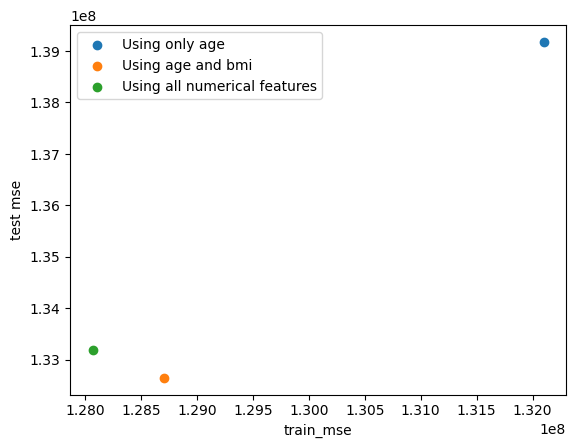

In [25]:
plt.scatter([train_mse_age], [test_mse_age], label="Using only age")
plt.scatter([train_mse_age_bmi], [test_mse_age_bmi], label="Using age and bmi")
plt.scatter([train_mse_all_numerical], [test_mse_all_numerical], label="Using all numerical features")
plt.ylabel("test mse")
plt.xlabel("train_mse")
plt.legend()

Including categorical features

In [26]:
cat_columns = insurance_df.select_dtypes(include=['object']).columns.tolist()
insurance_df_train[cat_columns].head()

,sex,smoker,region
621,male,yes,southwest
194,male,no,southeast
240,female,yes,northeast
1168,male,no,southwest
1192,female,no,northeast


To use the categorical features for fitting, we have to convert them to numbers. That can be done by label encoding and one hot encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
labelEncoders = {c: LabelEncoder() for c in cat_columns}
lbl_insurance_df_train = insurance_df_train.copy()
for c in cat_columns:
    labelEncoders[c].fit(insurance_df_train[c])
    lbl_insurance_df_train[c] = labelEncoders[c].transform(insurance_df_train[c])

lbl_insurance_df_train[cat_columns].head()

,sex,smoker,region
621,1,1,3
194,1,0,2
240,0,1,0
1168,1,0,3
1192,0,0,0


Training with all features

In [28]:
X_train = lbl_insurance_df_train.drop(columns = ["charges"])
y_train = lbl_insurance_df_train["charges"]

# label encode the test data
lbl_insurance_df_test = insurance_df_test.copy()
for c in cat_columns:
    lbl_insurance_df_test[c] = labelEncoders[c].transform(insurance_df_test[c])

X_test = lbl_insurance_df_test.drop(columns=["charges"])
y_test = lbl_insurance_df_test["charges"]

# feature scaling/normalization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# training
linreg.fit(X_train, y_train)

train_mse_all = mean_squared_error(y_train, linreg.predict(X_train))
test_mse_all = mean_squared_error(y_test, linreg.predict(X_test))

print(
    "Using all the features:\n"
    f"train mse = {train_mse_all}\n"
    f"test mse  = {test_mse_all}"
)

Using all the features:
train mse = 37729580.50984919
test mse  = 31845929.13415943


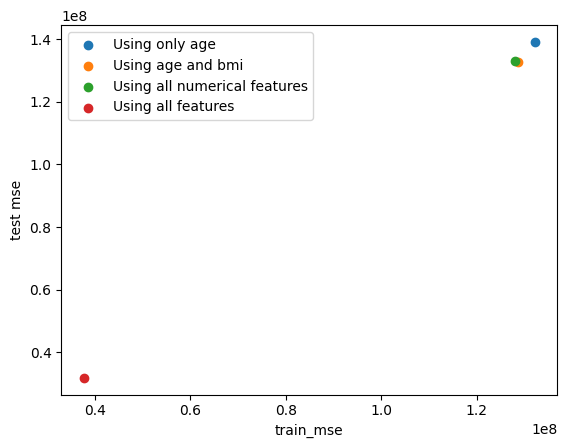

In [29]:
plt.scatter([train_mse_age], [test_mse_age], label="Using only age")
plt.scatter([train_mse_age_bmi], [test_mse_age_bmi], label="Using age and bmi")
plt.scatter([train_mse_all_numerical], [test_mse_all_numerical], label="Using all numerical features")
plt.scatter([train_mse_all], [test_mse_all], label="Using all features")
plt.ylabel("test mse")
plt.xlabel("train_mse")
plt.legend()

Using one hot encoding to convert the categorical features

In [30]:
pd.get_dummies(insurance_df_train, columns=cat_columns).head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
621,37,34.100,4,40182.24600,False,True,False,True,False,False,False,True
194,18,34.430,0,1137.46970,False,True,True,False,False,False,True,False
240,23,36.670,2,38511.62830,True,False,False,True,True,False,False,False
1168,32,35.200,2,4670.64000,False,True,True,False,False,False,False,True
1192,58,32.395,1,13019.16105,True,False,True,False,True,False,False,False


In [31]:
X_train = pd.get_dummies(insurance_df_train).drop(columns = ["charges"])
y_train = insurance_df_train["charges"]
X_test = pd.get_dummies(insurance_df_test).drop(columns=["charges"])
y_test = insurance_df_test["charges"]

# feature scaling/normalization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# training
linreg.fit(X_train, y_train)

train_mse_all_onehot = mean_squared_error(y_train, linreg.predict(X_train))
test_mse_all_onehot = mean_squared_error(y_test, linreg.predict(X_test))

print(
    "Using all the features:\n"
    f"train mse = {train_mse_all_onehot}\n"
    f"test mse  = {test_mse_all_onehot}"
)

Using all the features:
train mse = 37701533.128629126
test mse  = 31827950.229523823


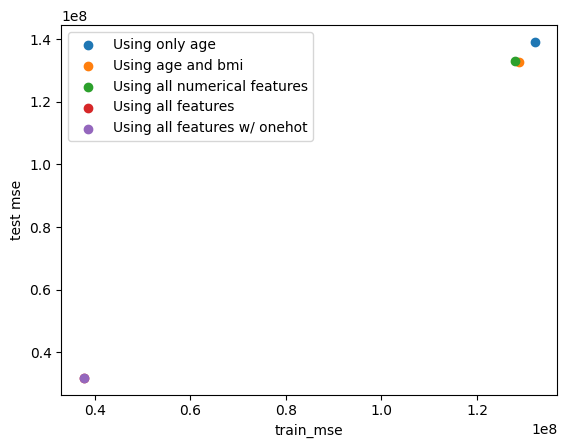

In [32]:
plt.scatter([train_mse_age], [test_mse_age], label="Using only age")
plt.scatter([train_mse_age_bmi], [test_mse_age_bmi], label="Using age and bmi")
plt.scatter([train_mse_all_numerical], [test_mse_all_numerical], label="Using all numerical features")
plt.scatter([train_mse_all], [test_mse_all], label="Using all features")
plt.scatter([train_mse_all_onehot], [test_mse_all_onehot], label="Using all features w/ onehot")
plt.ylabel("test mse")
plt.xlabel("train_mse")
plt.legend()

# Linear Classification

In [33]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine["data"]
y = wine["target"]
feature_names = wine["feature_names"]
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [34]:
wine["target_names"].tolist()

['class_0', 'class_1', 'class_2']

In [36]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)    #creating the train-test split
X_train = train_df.drop(columns=["target"]).values
y_train = train_df["target"]
X_test = test_df.drop(columns=["target"]).values
y_test = test_df["target"]

#scale/normalize
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training a linear classifier

In [37]:
from sklearn.linear_model import LogisticRegression     #Using Logistic Regression
from sklearn.metrics import accuracy_score

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, logReg.predict(X_train))
test_accuracy = accuracy_score(y_test, logReg.predict(X_test))

print(
    f"Train accuracy is {train_accuracy}\n"
    f"Test accuracy is {test_accuracy}"
)

Train accuracy is 0.9859154929577465
Test accuracy is 1.0


In [38]:
from sklearn.svm import LinearSVC      #Using SVM-Support Vector Machines
svm = LinearSVC()
svm.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, svm.predict(X_test))

print(
    f"Train accuracy is {train_accuracy}\n"
    f"Test accuracy is {test_accuracy}"
)

Train accuracy is 0.9859154929577465
Test accuracy is 1.0
